In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('safecast4.csv')

In [4]:
df.columns

Index(['lat', 'long', 'datetime', 'doserate', 'mlat', 'mlong', 'mloc_id',
       'mtime', 'mdr', 'distance', 'timediff', 'drdiff'],
      dtype='object')

In [7]:
from math import cos, sqrt, sin, radians, atan2
fuk_lat_rad = radians(37.4231)
fuk_lng_rad = radians(141.0331)
def haversine_distance(lat1,lng1,lat2=fuk_lat_rad,lng2=fuk_lng_rad):
    R = 6731.0 #radius of Earth in km
    dlon = lng2 - lng1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
    c = 2 * atan2(sqrt(a), sqrt(1-a)) 
    return 6731.0 * c

df['fukdist'] = df.apply(lambda row: haversine_distance(*map(radians,row[['lat','long']])),axis=1)

In [9]:
lims = df[df.doserate > 11.41]

In [10]:
lims.fukdist.describe()

count    3613.000000
mean       11.631509
std         9.291547
min         1.136481
25%         5.331910
50%        10.869495
75%        10.873164
max        62.917986
Name: fukdist, dtype: float64

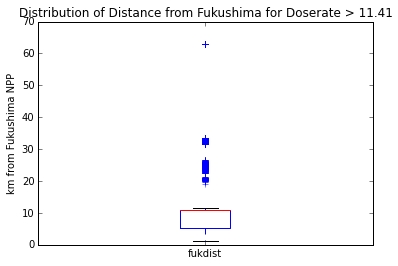

In [14]:
%matplotlib inline
ax = lims.fukdist.plot(kind='box')
ax.set_ylabel('km from Fukushima NPP')
ax.set_title('Distribution of Distance from Fukushima for Doserate > 11.41')

In [17]:
len(lims[lims.mdr > 11.41].index)

0

In [6]:
radians(37.4231)

0.6531563113030899